In [1]:
import os
import time
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import warnings

warnings.simplefilter('ignore')

In [2]:
def load_gml_network(file_path):
    G = nx.read_gml(file_path, label='id')
    A = nx.to_numpy_array(G)
    n = len(G.nodes())
    net = {}
    net['noNodes'] = n
    net['mat'] = A.tolist()
    degrees = [G.degree[node] for node in G.nodes()]
    net['degrees'] = degrees
    net['noEdges'] = G.number_of_edges()
    net['values'] = [G.nodes[node].get('value', None) for node in G.nodes()]

    net['graph'] = G
    return net

def net_to_graph(network):
    if 'graph' in network:
        return network['graph']
    A = np.matrix(network["mat"])
    G = nx.from_numpy_array(A)
    return G


In [3]:

def visualize_communities(G, communities):
    if isinstance(communities[0], (list, np.ndarray)):
        communities = [np.argmax(c) for c in communities]

    num_communities = len(set(communities))
    cmap = plt.cm.get_cmap('tab20' if num_communities <= 20 else 'gist_rainbow', max(num_communities, 20))

    community_colors = [cmap(c % 20) for c in communities]

    plt.figure(figsize=(10, 8))
    pos = nx.spring_layout(G, seed=42)

    nx.draw_networkx_nodes(G, pos, node_size=200, node_color=community_colors)
    nx.draw_networkx_edges(G, pos, alpha=0.5)
    nx.draw_networkx_labels(G, pos, font_size=8)

    plt.title(f"Community Detection Results ({num_communities} communities)")
    plt.axis('off')
    plt.show()


In [13]:
from detectCommunitiesFunctions.detectWithLibrary import detect_communities_with_library
from detectCommunitiesFunctions.detectWithGAModularity import detect_communities_with_ga_modularity
from detectCommunitiesFunctions.detectWithGAFitness1 import detect_communities_with_ga_fitness1
from detectCommunitiesFunctions.detectWithGAFitness2 import detect_communities_with_ga_fitness2

def main():
    crtDir = os.getcwd()

    print("Directories: ")
    real_dir = os.path.join(crtDir, 'real')
    if os.path.exists(real_dir):
        network_dirs = [d for d in os.listdir(real_dir) if os.path.isdir(os.path.join(real_dir, d))]
        for i, name in enumerate(network_dirs):
            print(f"{i+1}. {name}")

        while True:
            choice = input("\nPick a number: ")

            try:
                idx = int(choice) - 1
                if 0 <= idx < len(network_dirs):
                    network_name = network_dirs[idx]
                    file_path = os.path.join(real_dir, network_name, f"{network_name}.gml")
                    break
                else:
                    print(f"Invalid number. Please enter a number between 1 and {len(network_dirs)}.")
            except ValueError:
                print("Please enter a valid number.")
    else:
        file_path = input("Enter path to network file: ")

    if not os.path.exists(file_path):
        print(f"Error: File {file_path} not found")
        return


    print(f"\nLoading network from {file_path}...")
    network = load_gml_network(file_path)
    G = net_to_graph(network)

    print(f"Loaded network with {network['noNodes']} nodes and {network['noEdges']} edges")

    #plot original network
    plt.figure(figsize=(10, 8))
    pos = nx.spring_layout(G, seed=42)
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=300, edge_color='gray')
    plt.title("Original Network")
    plt.show()

    print("\nPick a method:")
    print("1. GA")
    print("2. Greedy")
    method_choice = input("Pick a number: ")

    if method_choice == "1":
        pop_size = int(input("Population size (default 100): ") or "100")
        num_generations = int(input("Number of generations (default 100): ") or "100")
        pc = float(input("Crossover probability (default 0.8): ") or "0.8")
        pm = float(input("Mutation probability (default 0.1): ") or "0.1")

        print(f"Running GA algorithm with population={pop_size}, generations={num_generations}...")
        result = detect_communities_with_ga_modularity(network, pop_size, num_generations, pc, pm)
        #result = detect_communities_with_ga_fitness1(network, pop_size,num_generations, pc, pm)
        #result = detect_communities_with_ga_fitness2(network, pop_size, num_generations, pc, pm)

    elif method_choice == "2":

        result = detect_communities_with_library(network,G=G)

    else:
        print("Invalid method selection.")
        return

    print("\n------Results------")
    print(f"Number of communities: {result['num_communities']}")
    print(f"Fitness: {result['fitness']:.4f}")
    print(f"Execution time: {result['execution_time']:.4f} seconds")


    visualize_communities(G, result['communities'])


    return result

Directories: 
1. baschet
2. cities
3. companies
4. dolphins
5. football
6. karate
7. krebs
8. movies
9. soccer
10. universities

Loading network from C:\Users\munte\PycharmProjects\lab10-eas-MihaiMunteanu1\real\football\football.gml...
Loaded network with 115 nodes and 613 edges


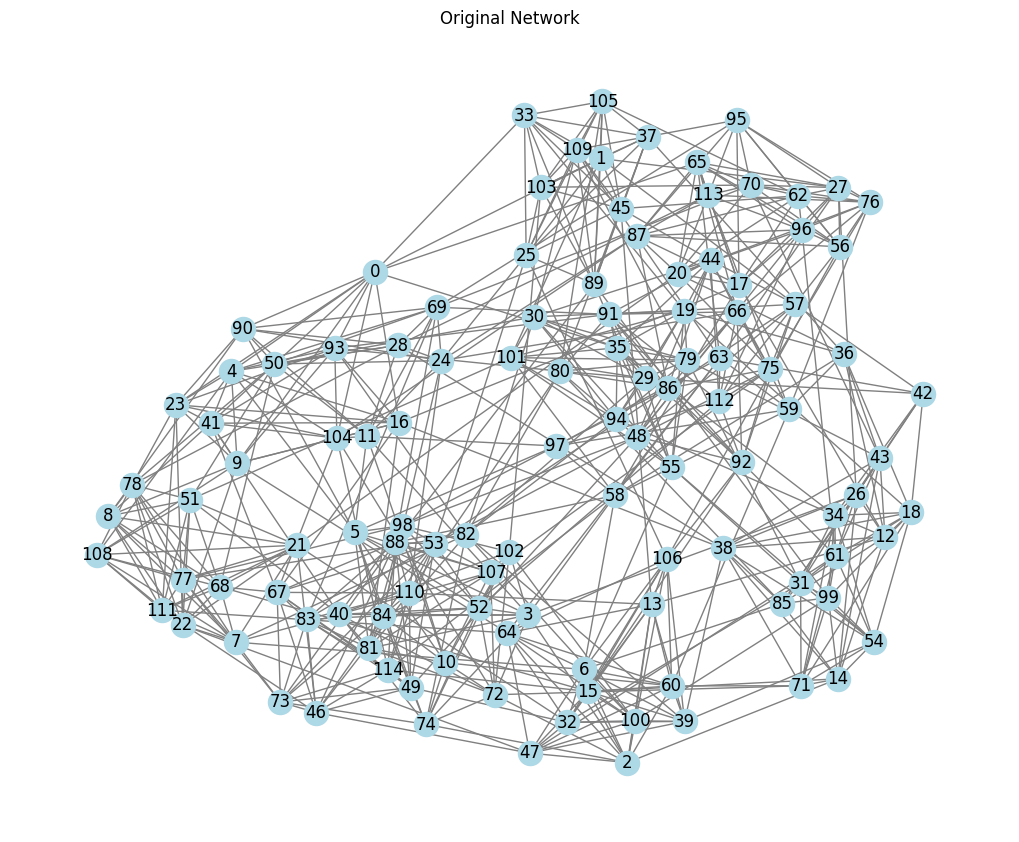


Pick a method:
1. GA
2. Greedy

------Results------
Number of communities: 6
Fitness: 0.5497
Execution time: 0.0499 seconds


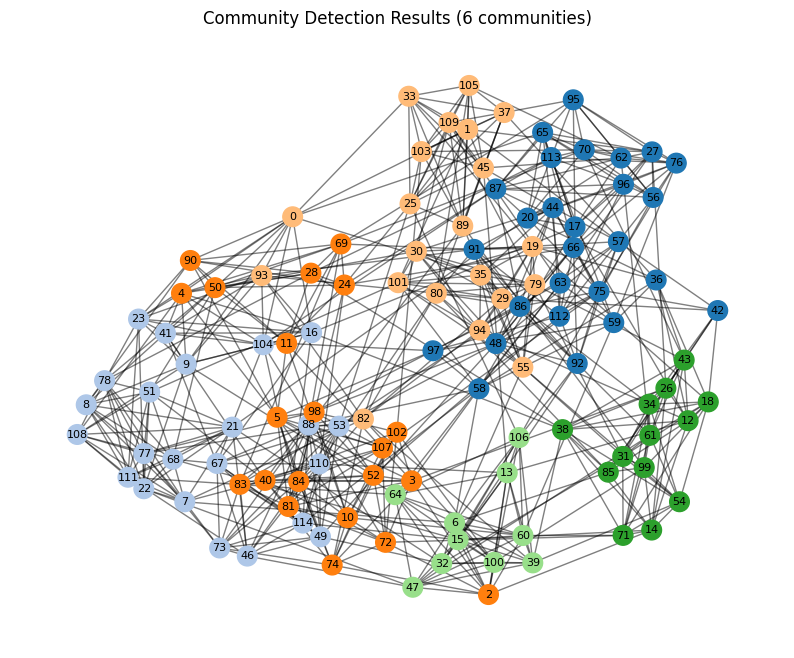

In [24]:
functie = main()